In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    precision_score,
    recall_score,
    mean_squared_error,
    auc,
    roc_curve,
    roc_auc_score,
    confusion_matrix,
)

# Get Data


In [3]:
# ! pip install yfinance

In [4]:
import yfinance as yf

xmr = yf.Ticker("XMR-USD")
df_xmr = yf.download(tickers="XMR-USD", period="max", interval="1d")

# xmr = yf.Ticker("BTC-USD")
# df_xmr = yf.download(tickers="BTC-USD", period="max", interval="1d")

[*********************100%%**********************]  1 of 1 completed


In [5]:
df_xmr

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600
2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000
2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000
2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000
2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000
...,...,...,...,...,...,...
2023-10-15,152.833466,153.465881,152.173126,152.448990,152.448990,31895675
2023-10-16,152.437531,153.522949,151.155411,152.544098,152.544098,64382308
2023-10-17,152.532791,152.532791,149.571411,150.522949,150.522949,59794609


In [6]:
df_xmr.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2171.000000,2171.000000,2171.000000,2171.000000,2171.000000,2.171000e+03
mean,150.046384,155.403395,144.218407,150.030797,150.030797,2.427030e+08
std,81.457885,85.922005,76.376754,81.403217,81.403217,9.975719e+08
min,33.084614,36.645374,26.703888,33.010323,33.010323,1.016030e+07
25%,83.947250,87.319965,80.641808,83.935036,83.935036,6.349469e+07
50%,144.323776,147.472183,141.322327,144.353073,144.353073,1.010728e+08
75%,190.458206,199.194748,182.937477,190.400291,190.400291,1.889335e+08
max,483.709991,517.620239,453.390991,483.583618,483.583618,2.895912e+10


In [7]:
df_xmr.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2171 entries, 2017-11-09 to 2023-10-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2171 non-null   float64
 1   High       2171 non-null   float64
 2   Low        2171 non-null   float64
 3   Close      2171 non-null   float64
 4   Adj Close  2171 non-null   float64
 5   Volume     2171 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 118.7 KB


# Make Label


In [8]:
df_xmr["Close_difference"] = df_xmr["Close"].shift(-1) - df_xmr["Close"]
df = df_xmr.copy()

In [9]:
df["Label"] = (df["Close_difference"] > 0).astype(int)
df.drop("Close_difference", axis=1, inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,Label
Date,,,,,,,
2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,0
2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,1
2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,1
2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,0
2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,0
...,...,...,...,...,...,...,...
2023-10-15,152.833466,153.465881,152.173126,152.448990,152.448990,31895675,1
2023-10-16,152.437531,153.522949,151.155411,152.544098,152.544098,64382308,0
2023-10-17,152.532791,152.532791,149.571411,150.522949,150.522949,59794609,0


In [10]:
df.corr()

,Open,High,Low,Close,Adj Close,Volume,Label
Open,1.000000,0.996612,0.992276,0.991349,0.991349,0.046550,-0.004225
High,0.996612,1.000000,0.991501,0.995690,0.995690,0.052446,-0.009270
Low,0.992276,0.991501,1.000000,0.995284,0.995284,0.043170,-0.008950
Close,0.991349,0.995690,0.995284,1.000000,1.000000,0.049304,-0.015507
Adj Close,0.991349,0.995690,0.995284,1.000000,1.000000,0.049304,-0.015507
Volume,0.046550,0.052446,0.043170,0.049304,0.049304,1.000000,0.012765
Label,-0.004225,-0.009270,-0.008950,-0.015507,-0.015507,0.012765,1.000000


In [11]:
df = df.reset_index(drop=False)
df

,Date,Open,High,Low,Close,Adj Close,Volume,Label
0,2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,0
1,2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,1
2,2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,1
3,2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,0
4,2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,0
...,...,...,...,...,...,...,...,...
2166,2023-10-15,152.833466,153.465881,152.173126,152.448990,152.448990,31895675,1
2167,2023-10-16,152.437531,153.522949,151.155411,152.544098,152.544098,64382308,0
2168,2023-10-17,152.532791,152.532791,149.571411,150.522949,150.522949,59794609,0
2169,2023-10-18,150.519150,152.444458,149.800720,149.800720,149.800720,49751092,1


# Fetching Data on a Specific Date


In [12]:
start_date_train_test = "2017-11-09"
end_date_train_test = "2023-10-07"

df_train_test = df[
    (df["Date"] >= start_date_train_test) & (df["Date"] <= end_date_train_test)
].reset_index(drop=True)
df_train_test

,Date,Open,High,Low,Close,Adj Close,Volume,Label
0,2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,0
1,2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,1
2,2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,1
3,2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,0
4,2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,0
...,...,...,...,...,...,...,...,...
2154,2023-10-03,146.193024,147.805603,145.165909,147.151352,147.151352,49389643,1
2155,2023-10-04,147.168442,150.702347,145.940781,150.469055,150.469055,59400400,0
2156,2023-10-05,150.474197,151.328369,148.565491,149.623718,149.623718,55704972,1
2157,2023-10-06,149.623337,152.669296,148.641647,151.992264,151.992264,49535004,1


# Split Data into Train and Test by Date


In [13]:
def train_test_split_by_date(
    df: pd.DataFrame,
    start_date_train: str,
    end_date_train: str,
    start_date_test: str,
    end_date_test: str,
    divide_X_y: bool = True,
    test: bool = True,
):
    df_train = df[
        (df["Date"] >= start_date_train) & (df["Date"] <= end_date_train)
    ].reset_index(drop=True)

    df_test = df[
        (df["Date"] >= start_date_test) & (df["Date"] <= end_date_test)
    ].reset_index(drop=True)

    if divide_X_y:
        X_train = df_train.drop(columns=["Label"])
        y_train = df_train["Label"]
        if test:
            X_test = df_test.drop(columns=["Label"])
            y_test = df_test["Label"]
            return X_train, X_test, y_train, y_test
        return X_train, y_train

    return df_train, df_test

In [14]:
start_date_train_val = "2017-11-09"
end_date_train_val = "2023-09-07"

start_date_test = "2023-09-08"
end_date_test = "2023-10-07"

df_train_val, df_test = train_test_split_by_date(
    df,
    start_date_train_val,
    end_date_train_val,
    start_date_test,
    end_date_test,
    divide_X_y=False,
)
df_test

,Date,Open,High,Low,Close,Adj Close,Volume,Label
0,2023-09-08,143.257370,144.124344,140.928955,143.886154,143.886154,46927009,0
1,2023-09-09,143.895950,144.001816,142.324234,143.406815,143.406815,35896666,0
2,2023-09-10,143.409027,143.792282,141.827194,142.894440,142.894440,33705148,0
3,2023-09-11,142.890076,143.619995,138.178223,139.930466,139.930466,58031716,1
4,2023-09-12,139.932358,142.853256,139.286240,140.804672,140.804672,57433672,1
5,2023-09-13,140.806717,144.639084,140.553345,143.115967,143.115967,54374646,1
6,2023-09-14,143.118500,147.058807,142.308243,146.329483,146.329483,44084896,1
7,2023-09-15,146.358139,149.150711,146.358139,147.350723,147.350723,57280169,0
8,2023-09-16,147.357681,148.031113,144.276459,144.624649,144.624649,34872985,1
9,2023-09-17,144.599152,146.145874,143.445023,145.797852,145.797852,31255846,0


# Plots


### Stock Chart Plot


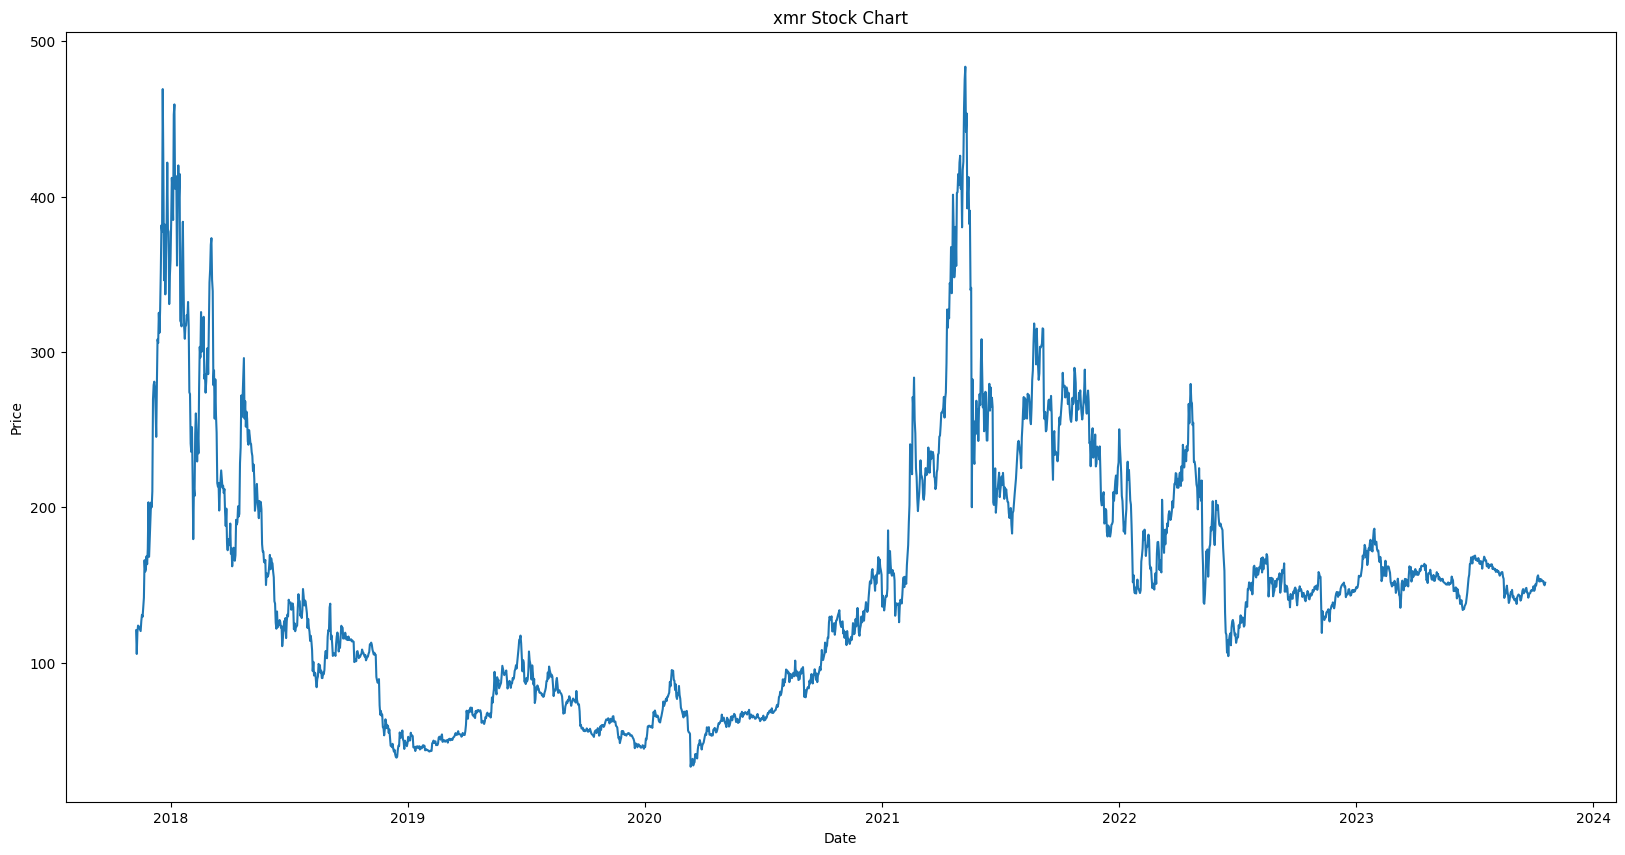

In [15]:
plt.figure(figsize=(20, 10))
plt.plot(df_xmr["Close"])
plt.title("xmr Stock Chart")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

### candlestick


In [16]:
# ! pip install mplfinance

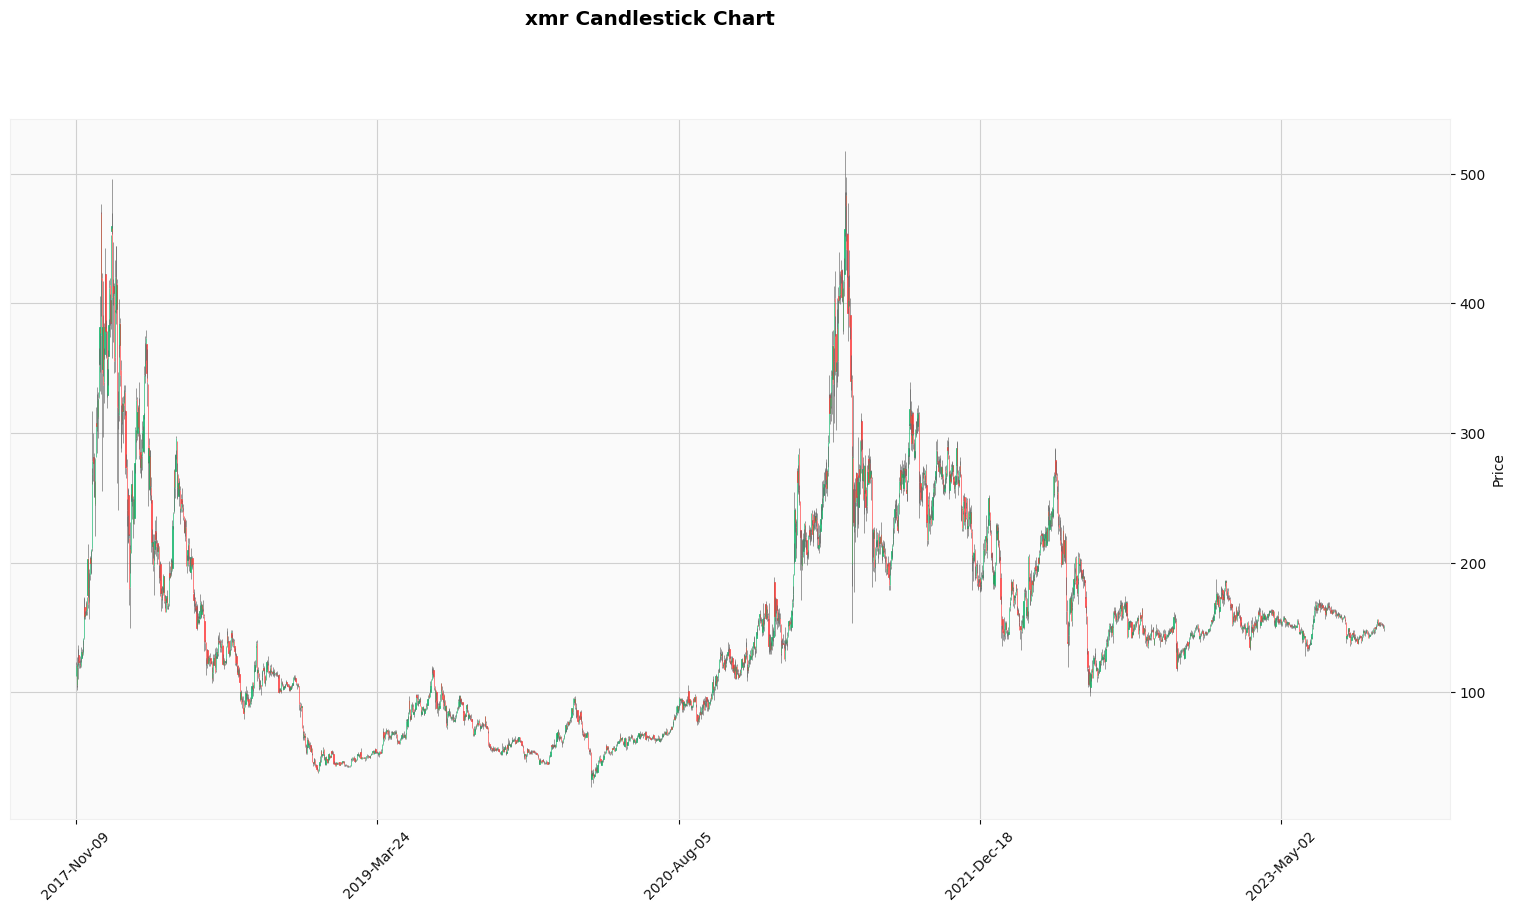

In [17]:
import mplfinance as mpf

mpf.plot(
    df_xmr.loc[:, :],
    figsize=(20, 10),
    type="candle",
    style="yahoo",
    title="xmr Candlestick Chart",
)

# Feature Engineering


### Check Missing Values


In [18]:
df_train_val.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Label        0
dtype: int64

### Split Data into Train and Validation


In [19]:
start_date_train = "2017-11-09"
end_date_train = "2023-06-07"

start_date_val = "2023-06-08"
end_date_val = "2023-09-07"

X_train, X_validation, y_train, y_validation = train_test_split_by_date(
    df_train_val,
    start_date_train,
    end_date_train,
    start_date_val,
    end_date_val,
    divide_X_y=True,
)

In [20]:
X_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600
1,2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000
2,2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000
3,2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000
4,2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000


In [21]:
X_train.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2037,2037.000000,2037.000000,2037.000000,2037.000000,2037.000000,2.037000e+03
mean,2020-08-23 00:00:00.000000256,149.914906,155.490554,143.838368,149.895335,149.895335,2.542309e+08
min,2017-11-09 00:00:00,33.084614,36.645374,26.703888,33.010323,33.010323,1.016030e+07
25%,2019-04-02 00:00:00,79.728378,82.755028,77.516289,79.704430,79.704430,6.595855e+07
50%,2020-08-23 00:00:00,142.119919,145.717621,137.881210,142.323288,142.323288,1.066830e+08
75%,2022-01-14 00:00:00,198.611115,205.264008,190.309052,198.738998,198.738998,1.967663e+08
max,2023-06-07 00:00:00,483.709991,517.620239,453.390991,483.583618,483.583618,2.895912e+10
std,NaN,84.056303,88.666899,78.794557,83.999876,83.999876,1.028817e+09


### Plot Distributions


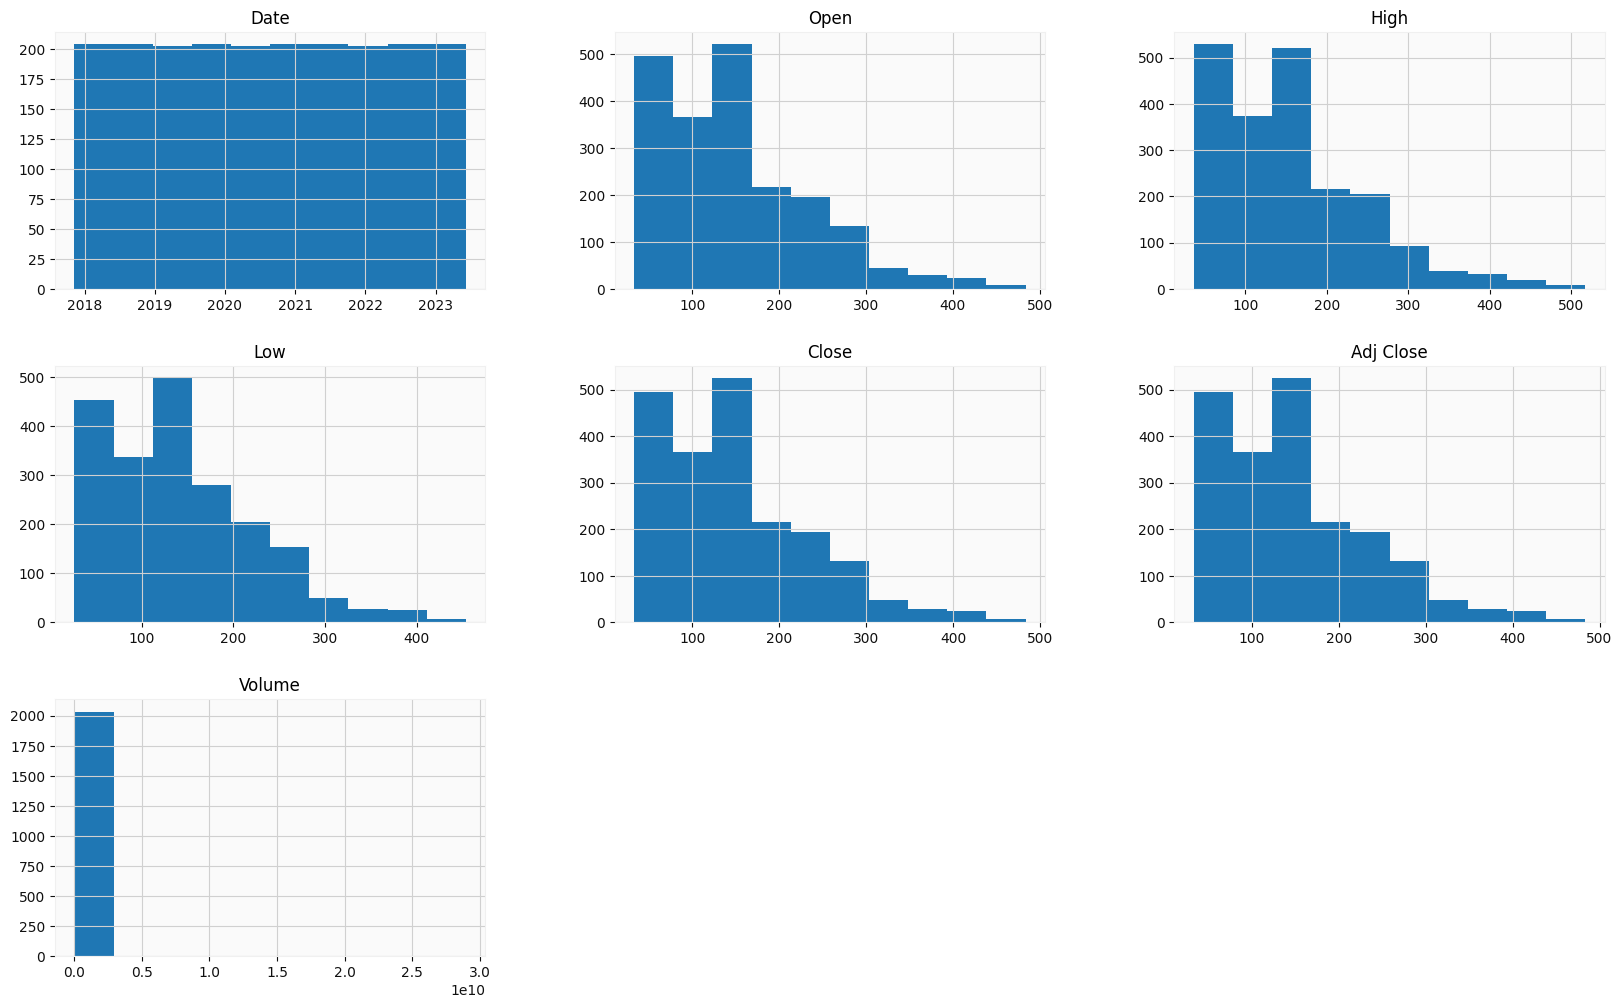

In [22]:
X_train.hist(figsize=[20, 12])
plt.show()

# Solution 1


## Method 1


### Train


#### Create Functions


##### Normalization Function


In [23]:
def normalization(X_train, X_test, method):
    X_train_normalized = X_train.copy()
    X_test_normalized = X_test.copy()

    if method == "StandardScaler":
        ss = StandardScaler()
        X_train_normalized[X_train.columns] = ss.fit_transform(X_train[X_train.columns])
        X_test_normalized[X_test.columns] = ss.transform(X_test[X_test.columns])

    if method == "MinMaxScaler":
        ms = MinMaxScaler()
        X_train_normalized[X_train.columns] = ms.fit_transform(X_train[X_train.columns])
        X_test_normalized[X_test.columns] = ms.transform(X_test[X_test.columns])

    if method == "PowerTransformer":
        pt = PowerTransformer()
        X_train_normalized[X_train.columns] = pt.fit_transform(X_train[X_train.columns])
        X_test_normalized[X_test.columns] = pt.transform(X_test[X_test.columns])

    return X_train_normalized, X_test_normalized

##### Evaluation Function


In [24]:
def evaluation(y_true, y_pred, df_evaluation, df_confusion, model_name):
    from pprint import pprint

    # Evaluate
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc_score = roc_auc_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    confusion = confusion_matrix(y_true, y_pred)

    new_record_evaluation = {
        "Accuracy": round(accuracy, 3),
        "Precision": round(precision, 3),
        "Recall": round(recall, 3),
        "F1 Score": round(f1, 3),
        "AUC": round(auc_score, 3),
        "MSE": round(mse, 3),
    }

    df_evaluation.loc[model_name] = new_record_evaluation

    # Confusion matrix

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # tp = np.sum((y_true == 1) & (y_pred == 1))
    # tn = np.sum((y_true == 0) & (y_pred == 0))
    # fp = np.sum((y_true == 0) & (y_pred == 1))
    # fn = np.sum((y_true == 1) & (y_pred == 0))

    new_record_confusion = {
        "tp": confusion[1, 1],
        "tn": confusion[0, 0],
        "fp": confusion[0, 1],
        "fn": confusion[1, 0],
    }

    df_confusion.loc[model_name] = new_record_confusion

    print("*" * 50)
    print("Model: ", model_name)
    print("*" * 35)
    print(confusion)
    pprint(new_record_evaluation)
    print("_" * 50)

    return df_evaluation, df_confusion

In [25]:
def plot_prediction(df, y_true, y_pred, title):
    import plotly.graph_objects as go

    data = df.copy()

    data["Predicted_Label"] = y_pred
    data["True_Label"] = y_true

    fig = go.Figure()

    for label, marker_symbol, marker_color in [
        ("True Positive", "circle", "blue"),
        ("True Negative", "x", "red"),
        ("False Positive", "x", "blue"),
        ("False Negative", "circle", "red"),
    ]:
        df_filtered = data[
            (
                data["True_Label"]
                == (label == "True Positive" or label == "False Negative")
            )
            & (
                data["Predicted_Label"]
                == (label == "True Positive" or label == "False Positive")
            )
        ]

        fig.add_trace(
            go.Scatter(
                x=df_filtered["Close"],
                y=df_filtered["Volume"],
                mode="markers",
                name=label,
                marker=dict(size=10, symbol=marker_symbol, color=marker_color),
            )
        )

    fig.update_xaxes(title_text="Close")
    fig.update_yaxes(title_text="Volume")
    fig.update_layout(title=title, showlegend=True)
    fig.show()

##### Model Function


In [26]:
def model_predict(
    df,
    model,
    test_item,
    start_date_train="2017-11-09",
    start_date_val="2023-08-08",
    end_date_val="2023-09-07",
):
    from datetime import date, timedelta

    test_item_date = test_item.Date.date()

    end_date_train = (test_item_date - timedelta(days=1)).strftime("%Y-%m-%d")

    X_train, y_train = train_test_split_by_date(
        df,
        start_date_train,
        end_date_train,
        start_date_val,
        end_date_val,
        divide_X_y=True,
        test=False,
    )

    X_train = X_train.drop("Date", axis=1)
    X_test = (test_item[1:].to_frame().T).astype(float)

    # Normalized
    X_train, X_test = normalization(X_train, X_test, method="PowerTransformer")

    # Train model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    return y_pred

#### Define Evaluation Matrixes


In [27]:
df_confusion_val = pd.DataFrame({}, columns=["tn", "fp", "fn", "tp"])
df_evaluation_val = pd.DataFrame(
    {},
    columns=[
        "Accuracy",
        "Precision",
        "Recall",
        "F1 Score",
        "AUC",
        "MSE",
    ],
)

#### Try models


##### Logistic Regression


In [28]:
def logestic_regression(
    df, X_test, y_test, df_evaluation, df_confusion, draw_plot=False
):
    from sklearn.linear_model import LogisticRegression

    model_lr = LogisticRegression()
    model_name = "Logistic Regression"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_lr
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )
    if draw_plot:
        plot_prediction(X_test, y_test, y_pred_list, model_name)

In [29]:
logestic_regression(
    df_train_val,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
    draw_plot=True,
)

**************************************************
Model:  Logistic Regression
***********************************
[[ 1 38]
 [ 7 46]]
{'AUC': 0.447,
 'Accuracy': 0.511,
 'F1 Score': 0.672,
 'MSE': 0.489,
 'Precision': 0.548,
 'Recall': 0.868}
__________________________________________________


##### Decision Tree


In [30]:
def decision_tree_classifier(
    df, X_test, y_test, df_evaluation, df_confusion, max_depth, draw_plot=False
):
    from sklearn.tree import DecisionTreeClassifier

    model_dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model_name = "Decision Tree " + str(max_depth)

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_dt
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )
    if draw_plot:
        plot_prediction(X_test, y_test, y_pred_list, model_name)

In [31]:
max_depths = [20, 15, 10, 8]
for max_depth in max_depths:
    decision_tree_classifier(
        df_train_val,
        X_validation,
        y_validation,
        df_evaluation_val,
        df_confusion_val,
        max_depth,
    )

**************************************************
Model:  Decision Tree 20
***********************************
[[ 9 30]
 [15 38]]
{'AUC': 0.474,
 'Accuracy': 0.511,
 'F1 Score': 0.628,
 'MSE': 0.489,
 'Precision': 0.559,
 'Recall': 0.717}
__________________________________________________
**************************************************
Model:  Decision Tree 15
***********************************
[[ 7 32]
 [ 7 46]]
{'AUC': 0.524,
 'Accuracy': 0.576,
 'F1 Score': 0.702,
 'MSE': 0.424,
 'Precision': 0.59,
 'Recall': 0.868}
__________________________________________________
**************************************************
Model:  Decision Tree 10
***********************************
[[ 0 39]
 [ 0 53]]
{'AUC': 0.5,
 'Accuracy': 0.576,
 'F1 Score': 0.731,
 'MSE': 0.424,
 'Precision': 0.576,
 'Recall': 1.0}
__________________________________________________
**************************************************
Model:  Decision Tree 8
***********************************
[[ 0 39]
 [ 0 53]]
{'

##### SVM


In [32]:
def svm(df, X_test, y_test, df_evaluation, df_confusion, draw_plot=False):
    from sklearn.svm import SVC

    model_svm = SVC()
    model_name = "SVM"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    # change Label 0 to -1
    # df["Label"] = df["Label"].replace({0: -1})
    # y_test = y_test.replace({0: -1})

    model_new = model_svm
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )
    if draw_plot:
        plot_prediction(X_test, y_test, y_pred_list, model_name)

In [33]:
svm(
    df_train_val.copy(),
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
    draw_plot=True,
)

**************************************************
Model:  SVM
***********************************
[[ 0 39]
 [ 0 53]]
{'AUC': 0.5,
 'Accuracy': 0.576,
 'F1 Score': 0.731,
 'MSE': 0.424,
 'Precision': 0.576,
 'Recall': 1.0}
__________________________________________________


##### AdaBoost


In [34]:
def ada_boost(df, X_test, y_test, df_evaluation, df_confusion, draw_plot=False):
    from sklearn.ensemble import AdaBoostClassifier

    model_ada = AdaBoostClassifier(learning_rate=2.5, random_state=42)
    model_name = "Ada Boost"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_ada
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )
    if draw_plot:
        plot_prediction(X_test, y_test, y_pred_list, model_name)

In [35]:
ada_boost(
    df_train_val,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
    draw_plot=True,
)

**************************************************
Model:  Ada Boost
***********************************
[[ 2 37]
 [ 8 45]]
{'AUC': 0.45,
 'Accuracy': 0.511,
 'F1 Score': 0.667,
 'MSE': 0.489,
 'Precision': 0.549,
 'Recall': 0.849}
__________________________________________________


##### KNN


In [36]:
def knn(
    df,
    X_test,
    y_test,
    df_evaluation,
    df_confusion,
    n_neighbors,
    metric="manhattan",
    draw_plot=False,
):
    from sklearn.neighbors import KNeighborsClassifier

    model_knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
    model_name = "KNN, K" + str(n_neighbors) + ", Metric: " + metric

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_knn
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )
    if draw_plot:
        plot_prediction(X_test, y_test, y_pred_list, model_name)

In [37]:
n_neighbors = [5, 10, 15, 20]
metrics = ["euclidean", "minkowski", "manhattan"]
for k in n_neighbors:
    for metric in metrics:
        knn(
            df_train_val,
            X_validation,
            y_validation,
            df_evaluation_val,
            df_confusion_val,
            k,
            metric,
        )

**************************************************
Model:  KNN, K5, Metric: euclidean
***********************************
[[14 25]
 [19 34]]
{'AUC': 0.5,
 'Accuracy': 0.522,
 'F1 Score': 0.607,
 'MSE': 0.478,
 'Precision': 0.576,
 'Recall': 0.642}
__________________________________________________
**************************************************
Model:  KNN, K5, Metric: minkowski
***********************************
[[14 25]
 [19 34]]
{'AUC': 0.5,
 'Accuracy': 0.522,
 'F1 Score': 0.607,
 'MSE': 0.478,
 'Precision': 0.576,
 'Recall': 0.642}
__________________________________________________
**************************************************
Model:  KNN, K5, Metric: manhattan
***********************************
[[16 23]
 [19 34]]
{'AUC': 0.526,
 'Accuracy': 0.543,
 'F1 Score': 0.618,
 'MSE': 0.457,
 'Precision': 0.596,
 'Recall': 0.642}
__________________________________________________
**************************************************
Model:  KNN, K10, Metric: euclidean
**************

##### Random Forest


In [38]:
def random_forest_classifier(
    df,
    X_test,
    y_test,
    df_evaluation,
    df_confusion,
    max_depth,
    draw_plot=False,
):
    from sklearn.ensemble import RandomForestClassifier

    model_rf = RandomForestClassifier(
        max_depth=max_depth,
        random_state=42,
        n_estimators=100,
    )
    model_name = "Random Forest " + str(max_depth)

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_rf
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )
    if draw_plot:
        plot_prediction(X_test, y_test, y_pred_list, model_name)

In [39]:
max_depths = [20, 10, 15, 14, 16]
for max_depth in max_depths:
    random_forest_classifier(
        df_train_val,
        X_validation,
        y_validation,
        df_evaluation_val,
        df_confusion_val,
        max_depth,
    )

**************************************************
Model:  Random Forest 20
***********************************
[[13 26]
 [19 34]]
{'AUC': 0.487,
 'Accuracy': 0.511,
 'F1 Score': 0.602,
 'MSE': 0.489,
 'Precision': 0.567,
 'Recall': 0.642}
__________________________________________________
**************************************************
Model:  Random Forest 10
***********************************
[[ 9 30]
 [ 8 45]]
{'AUC': 0.54,
 'Accuracy': 0.587,
 'F1 Score': 0.703,
 'MSE': 0.413,
 'Precision': 0.6,
 'Recall': 0.849}
__________________________________________________
**************************************************
Model:  Random Forest 15
***********************************
[[14 25]
 [17 36]]
{'AUC': 0.519,
 'Accuracy': 0.543,
 'F1 Score': 0.632,
 'MSE': 0.457,
 'Precision': 0.59,
 'Recall': 0.679}
__________________________________________________
**************************************************
Model:  Random Forest 14
***********************************
[[13 26]
 [13 40]]


##### Gausian


In [40]:
def gaussian_nb(df, X_test, y_test, df_evaluation, df_confusion, draw_plot=False):
    from sklearn.naive_bayes import GaussianNB

    model_gnb = GaussianNB()
    model_name = "Gaussian NB"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_gnb
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )
    if draw_plot:
        plot_prediction(X_test, y_test, y_pred_list, model_name)

In [41]:
gaussian_nb(
    df_train_val,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
    draw_plot=True,
)

**************************************************
Model:  Gaussian NB
***********************************
[[ 0 39]
 [ 0 53]]
{'AUC': 0.5,
 'Accuracy': 0.576,
 'F1 Score': 0.731,
 'MSE': 0.424,
 'Precision': 0.576,
 'Recall': 1.0}
__________________________________________________


##### XGboost


In [42]:
# ! pip install xgboost

In [43]:
def xg_boost(df, X_test, y_test, df_evaluation, df_confusion, draw_plot=False):
    from xgboost import XGBClassifier

    model_xgb = XGBClassifier(random_state=42)
    model_name = "Xg Boost"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = model_xgb
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )
    if draw_plot:
        plot_prediction(X_test, y_test, y_pred_list, model_name)

In [44]:
xg_boost(
    df_train_val,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
    draw_plot=True,
)

**************************************************
Model:  Xg Boost
***********************************
[[15 24]
 [23 30]]
{'AUC': 0.475,
 'Accuracy': 0.489,
 'F1 Score': 0.561,
 'MSE': 0.511,
 'Precision': 0.556,
 'Recall': 0.566}
__________________________________________________


##### Staking Models


In [45]:
order_columns = [
    "F1 Score",
    "Accuracy",
    "AUC",
    "MSE",
    "tn",
    "fn",
    "tp",
    "fp",
    "Recall",
    "Precision",
]

In [46]:
merged_evaluation_val = (
    df_evaluation_val.reset_index()
    .merge(df_confusion_val.reset_index())
    .set_index("index")
)
merged_evaluation_val.index.name = "Model"
merged_evaluation_val = merged_evaluation_val.sort_values(
    by=order_columns,
    ascending=[False, False, False, True, False, True, False, True, False, False],
)
merged_evaluation_val[order_columns]

,F1 Score,Accuracy,AUC,MSE,tn,fn,tp,fp,Recall,Precision
Model,,,,,,,,,,
Decision Tree 10,0.731,0.576,0.500,0.424,0,0,53,39,1.000,0.576
Decision Tree 8,0.731,0.576,0.500,0.424,0,0,53,39,1.000,0.576
SVM,0.731,0.576,0.500,0.424,0,0,53,39,1.000,0.576
Gaussian NB,0.731,0.576,0.500,0.424,0,0,53,39,1.000,0.576
Random Forest 10,0.703,0.587,0.540,0.413,9,8,45,30,0.849,0.600
Decision Tree 15,0.702,0.576,0.524,0.424,7,7,46,32,0.868,0.590
"KNN, K15, Metric: manhattan",0.689,0.587,0.550,0.413,12,11,42,27,0.792,0.609
"KNN, K15, Metric: euclidean",0.672,0.587,0.560,0.413,15,14,39,24,0.736,0.619
"KNN, K15, Metric: minkowski",0.672,0.587,0.560,0.413,15,14,39,24,0.736,0.619


We choose 'Knn K:15, Metric:manhattan' and Decision Tree(max_depth:15)


In [47]:
# ! pip install mlxtend

In [48]:
def stacking(
    model1, model2, df, X_test, y_test, df_evaluation, df_confusion, draw_plot=False
):
    from mlxtend.classifier import StackingClassifier
    from sklearn.ensemble import RandomForestClassifier

    stacking_model = StackingClassifier(
        classifiers=[model1, model2],
        use_probas=True,
        meta_classifier=RandomForestClassifier(n_estimators=100, random_state=42),
    )

    model_name = "Stacking"

    df_confusion.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
    df_evaluation.loc[model_name] = {
        "Accuracy": 0,
        "Precision": 0,
        "Recall": 0,
        "F1 Score": 0,
        "AUC": 0,
        "MSE": 0,
    }

    model_new = stacking_model
    y_pred_list = []
    for i in range(len(X_test)):
        test_item = X_test.iloc[i]

        model = model_new

        y_val_pred = model_predict(df, model, test_item)
        y_pred_list.append(y_val_pred[0])

    df_evaluation, df_confusion = evaluation(
        y_test.tolist(), y_pred_list, df_evaluation, df_confusion, model_name
    )
    if draw_plot:
        title = ""
        plot_prediction(X_test, y_test, y_pred_list, title)

In [115]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

model_knn15 = KNeighborsClassifier(n_neighbors=15, metric="manhattan")
model_rf13 = RandomForestClassifier(n_estimators=100, max_depth=13, random_state=42)
model_dt15 = DecisionTreeClassifier(max_depth=15, random_state=42)
model_rf16 = RandomForestClassifier(n_estimators=100, max_depth=16, random_state=42)

In [114]:
stacking(
    model_knn15,
    model_dt15,
    df_train_val,
    X_validation,
    y_validation,
    df_evaluation_val,
    df_confusion_val,
    draw_plot=True,
)

**************************************************
Model:  Stacking
***********************************
[[15 24]
 [10 43]]
{'AUC': 0.598,
 'Accuracy': 0.63,
 'F1 Score': 0.717,
 'MSE': 0.37,
 'Precision': 0.642,
 'Recall': 0.811}
__________________________________________________


In [124]:
f1_score(y_validation, y_validation.shift(1).fillna(0))

0.5333333333333333

In [125]:
f1_score(y_validation, y_validation.shift(1).fillna(1))

0.5471698113207547

#### Evaluation


In [116]:
merged_evaluation_val = (
    df_evaluation_val.reset_index()
    .merge(df_confusion_val.reset_index())
    .set_index("index")
)
merged_evaluation_val.index.name = "Model"
merged_evaluation_val = merged_evaluation_val.sort_values(
    by=order_columns,
    ascending=[False, False, False, False, True, True, False, True, False, False],
)
merged_evaluation_val[order_columns]

,F1 Score,Accuracy,AUC,MSE,tn,fn,tp,fp,Recall,Precision
Model,,,,,,,,,,
Decision Tree 10,0.731,0.576,0.500,0.424,0,0,53,39,1.000,0.576
Decision Tree 8,0.731,0.576,0.500,0.424,0,0,53,39,1.000,0.576
SVM,0.731,0.576,0.500,0.424,0,0,53,39,1.000,0.576
Gaussian NB,0.731,0.576,0.500,0.424,0,0,53,39,1.000,0.576
Stacking,0.717,0.630,0.598,0.370,15,10,43,24,0.811,0.642
Random Forest 10,0.703,0.587,0.540,0.413,9,8,45,30,0.849,0.600
Decision Tree 15,0.702,0.576,0.524,0.424,7,7,46,32,0.868,0.590
"KNN, K15, Metric: manhattan",0.689,0.587,0.550,0.413,12,11,42,27,0.792,0.609
"KNN, K15, Metric: euclidean",0.672,0.587,0.560,0.413,15,14,39,24,0.736,0.619


Stacking Model is the best


### Test


#### Devide X, y


In [52]:
X_test = df_test.drop(columns=["Label"])
y_test = df_test["Label"]

In [53]:
X_test.shape

(30, 7)

#### Define Ealuation Dataframes


In [119]:
df_confusion_test = pd.DataFrame({}, columns=["tn", "fp", "fn", "tp"])
df_evaluation_test = pd.DataFrame(
    {}, columns=["Accuracy", "Precision", "Recall", "F1 Score", "AUC", "MSE"]
)

#### Try Model


In [122]:
stacking(
    model_knn15,
    model_dt15,
    df_train_test,
    X_test,
    y_test,
    df_evaluation_test,
    df_confusion_test,
    draw_plot=True,
)

**************************************************
Model:  Stacking
***********************************
[[9 3]
 [9 9]]
{'AUC': 0.625,
 'Accuracy': 0.6,
 'F1 Score': 0.6,
 'MSE': 0.4,
 'Precision': 0.75,
 'Recall': 0.5}
__________________________________________________


#### Evaluation


In [123]:
merged_evaluation_test = (
    df_evaluation_test.reset_index()
    .merge(df_confusion_test.reset_index())
    .set_index("index")
)
merged_evaluation_test.index.name = "Model"

merged_evaluation_test[order_columns]

,F1 Score,Accuracy,AUC,MSE,tn,fn,tp,fp,Recall,Precision
Model,,,,,,,,,,
Stacking,0.6,0.6,0.625,0.4,9,9,9,3,0.5,0.75


In [59]:
f1_score(y_test, y_test.shift(1).fillna(0))

0.5714285714285715

In [60]:
f1_score(y_test, y_test.shift(1).fillna(1))

0.5555555555555556

## Method 2


### Create Data Frames


Add Variance Feature


In [61]:
df_train_val_variance = df_train_val.copy()
df_train_val_variance["Variance"] = (
    df_train_val_variance["High"] - df_train_val_variance["Low"]
)
drop_columns = ["Open", "High", "Low", "Adj Close"]
df_train_val_variance.drop(columns=drop_columns, inplace=True)

df_train_test_variance = df_train_test.copy()
df_train_test_variance["Variance"] = (
    df_train_test_variance["High"] - df_train_test_variance["Low"]
)
df_train_test_variance.drop(columns=drop_columns, inplace=True)

In [62]:
X_validation_variance = X_validation.copy()
X_validation_variance["Variance"] = (
    X_validation_variance["High"] - X_validation_variance["Low"]
)
X_validation_variance.drop(columns=drop_columns, inplace=True)

### Train


#### Define Evaluation Matrixes


In [63]:
df_confusion_val_variance = pd.DataFrame({}, columns=["tn", "fp", "fn", "tp"])
df_evaluation_val_variance = pd.DataFrame(
    {},
    columns=[
        "Accuracy",
        "Precision",
        "Recall",
        "F1 Score",
        "AUC",
        "MSE",
    ],
)

#### Try models


##### Logistic Regression


In [64]:
logestic_regression(
    df_train_val_variance,
    X_validation_variance,
    y_validation,
    df_evaluation_val_variance,
    df_confusion_val_variance,
    draw_plot=True,
)

**************************************************
Model:  Logistic Regression
***********************************
[[ 0 39]
 [ 0 53]]
{'AUC': 0.5,
 'Accuracy': 0.576,
 'F1 Score': 0.731,
 'MSE': 0.424,
 'Precision': 0.576,
 'Recall': 1.0}
__________________________________________________


##### Decision Tree


In [65]:
max_depths = [20, 15, 10, 8]
for max_depth in max_depths:
    decision_tree_classifier(
        df_train_val_variance,
        X_validation_variance,
        y_validation,
        df_evaluation_val_variance,
        df_confusion_val_variance,
        max_depth,
    )

**************************************************
Model:  Decision Tree 20
***********************************
[[11 28]
 [25 28]]
{'AUC': 0.405,
 'Accuracy': 0.424,
 'F1 Score': 0.514,
 'MSE': 0.576,
 'Precision': 0.5,
 'Recall': 0.528}
__________________________________________________
**************************************************
Model:  Decision Tree 15
***********************************
[[ 6 33]
 [19 34]]
{'AUC': 0.398,
 'Accuracy': 0.435,
 'F1 Score': 0.567,
 'MSE': 0.565,
 'Precision': 0.507,
 'Recall': 0.642}
__________________________________________________
**************************************************
Model:  Decision Tree 10
***********************************
[[ 4 35]
 [ 6 47]]
{'AUC': 0.495,
 'Accuracy': 0.554,
 'F1 Score': 0.696,
 'MSE': 0.446,
 'Precision': 0.573,
 'Recall': 0.887}
__________________________________________________
**************************************************
Model:  Decision Tree 8
***********************************
[[ 2 37]
 [ 3 50]]

##### SVM


In [66]:
svm(
    df_train_val_variance.copy(),
    X_validation_variance,
    y_validation,
    df_evaluation_val_variance,
    df_confusion_val_variance,
    draw_plot=True,
)

**************************************************
Model:  SVM
***********************************
[[ 0 39]
 [ 0 53]]
{'AUC': 0.5,
 'Accuracy': 0.576,
 'F1 Score': 0.731,
 'MSE': 0.424,
 'Precision': 0.576,
 'Recall': 1.0}
__________________________________________________


##### AdaBoost


In [67]:
ada_boost(
    df_train_val_variance,
    X_validation_variance,
    y_validation,
    df_evaluation_val_variance,
    df_confusion_val_variance,
    draw_plot=True,
)

**************************************************
Model:  Ada Boost
***********************************
[[ 0 39]
 [ 0 53]]
{'AUC': 0.5,
 'Accuracy': 0.576,
 'F1 Score': 0.731,
 'MSE': 0.424,
 'Precision': 0.576,
 'Recall': 1.0}
__________________________________________________


##### KNN


In [68]:
n_neighbors = [5, 10, 15, 20]
metrics = ["euclidean", "minkowski", "manhattan"]
for k in n_neighbors:
    for metric in metrics:
        knn(
            df_train_val_variance,
            X_validation_variance,
            y_validation,
            df_evaluation_val_variance,
            df_confusion_val_variance,
            k,
            metric,
        )

**************************************************
Model:  KNN, K5, Metric: euclidean
***********************************
[[12 27]
 [19 34]]
{'AUC': 0.475,
 'Accuracy': 0.5,
 'F1 Score': 0.596,
 'MSE': 0.5,
 'Precision': 0.557,
 'Recall': 0.642}
__________________________________________________
**************************************************
Model:  KNN, K5, Metric: minkowski
***********************************
[[12 27]
 [19 34]]
{'AUC': 0.475,
 'Accuracy': 0.5,
 'F1 Score': 0.596,
 'MSE': 0.5,
 'Precision': 0.557,
 'Recall': 0.642}
__________________________________________________
**************************************************
Model:  KNN, K5, Metric: manhattan
***********************************
[[12 27]
 [21 32]]
{'AUC': 0.456,
 'Accuracy': 0.478,
 'F1 Score': 0.571,
 'MSE': 0.522,
 'Precision': 0.542,
 'Recall': 0.604}
__________________________________________________
**************************************************
Model:  KNN, K10, Metric: euclidean
******************

##### Random Forest


In [69]:
max_depths = [20, 10, 15, 14, 16]
for max_depth in max_depths:
    random_forest_classifier(
        df_train_val_variance,
        X_validation_variance,
        y_validation,
        df_evaluation_val_variance,
        df_confusion_val_variance,
        max_depth,
    )

**************************************************
Model:  Random Forest 20
***********************************
[[10 29]
 [14 39]]
{'AUC': 0.496,
 'Accuracy': 0.533,
 'F1 Score': 0.645,
 'MSE': 0.467,
 'Precision': 0.574,
 'Recall': 0.736}
__________________________________________________
**************************************************
Model:  Random Forest 10
***********************************
[[ 7 32]
 [12 41]]
{'AUC': 0.477,
 'Accuracy': 0.522,
 'F1 Score': 0.651,
 'MSE': 0.478,
 'Precision': 0.562,
 'Recall': 0.774}
__________________________________________________
**************************************************
Model:  Random Forest 15
***********************************
[[12 27]
 [14 39]]
{'AUC': 0.522,
 'Accuracy': 0.554,
 'F1 Score': 0.655,
 'MSE': 0.446,
 'Precision': 0.591,
 'Recall': 0.736}
__________________________________________________
**************************************************
Model:  Random Forest 14
***********************************
[[12 27]
 [13 4

##### Gausian


In [70]:
gaussian_nb(
    df_train_val_variance,
    X_validation_variance,
    y_validation,
    df_evaluation_val_variance,
    df_confusion_val_variance,
    draw_plot=True,
)

**************************************************
Model:  Gaussian NB
***********************************
[[ 0 39]
 [ 0 53]]
{'AUC': 0.5,
 'Accuracy': 0.576,
 'F1 Score': 0.731,
 'MSE': 0.424,
 'Precision': 0.576,
 'Recall': 1.0}
__________________________________________________


##### XGboost


In [71]:
xg_boost(
    df_train_val_variance,
    X_validation_variance,
    y_validation,
    df_evaluation_val_variance,
    df_confusion_val_variance,
    draw_plot=True,
)

**************************************************
Model:  Xg Boost
***********************************
[[14 25]
 [24 29]]
{'AUC': 0.453,
 'Accuracy': 0.467,
 'F1 Score': 0.542,
 'MSE': 0.533,
 'Precision': 0.537,
 'Recall': 0.547}
__________________________________________________


##### Staking Models


In [72]:
merged_evaluation_val_variance = (
    df_evaluation_val_variance.reset_index()
    .merge(df_confusion_val_variance.reset_index())
    .set_index("index")
)
merged_evaluation_val_variance.index.name = "Model"
merged_evaluation_val_variance = merged_evaluation_val_variance.sort_values(
    by=order_columns,
    ascending=[False, False, False, True, False, True, False, True, False, False],
)
merged_evaluation_val_variance[order_columns]

,F1 Score,Accuracy,AUC,MSE,tn,fn,tp,fp,Recall,Precision
Model,,,,,,,,,,
Logistic Regression,0.731,0.576,0.500,0.424,0,0,53,39,1.000,0.576
SVM,0.731,0.576,0.500,0.424,0,0,53,39,1.000,0.576
Ada Boost,0.731,0.576,0.500,0.424,0,0,53,39,1.000,0.576
Gaussian NB,0.731,0.576,0.500,0.424,0,0,53,39,1.000,0.576
Decision Tree 8,0.714,0.565,0.497,0.435,2,3,50,37,0.943,0.575
Decision Tree 10,0.696,0.554,0.495,0.446,4,6,47,35,0.887,0.573
Random Forest 16,0.678,0.587,0.557,0.413,14,13,40,25,0.755,0.615
Random Forest 14,0.667,0.565,0.531,0.435,12,13,40,27,0.755,0.597
Random Forest 15,0.655,0.554,0.522,0.446,12,14,39,27,0.736,0.591


We choose 'Knn K:15, Metric:manhattan' and Decision Tree(max_depth:10)


In [73]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# model_svm = SVC(probability=True)
# model_lr = LogisticRegression(C=1, penalty="l2")

# model_adaboost = AdaBoostClassifier(learning_rate=0.9, random_state=42)
# model_xgb = XGBClassifier(objective="binary:logistic", random_state=42)


model_knn15 = KNeighborsClassifier(n_neighbors=15, metric="manhattan")
model_rf13 = RandomForestClassifier(n_estimators=100, max_depth=13, random_state=42)
model_dt10 = DecisionTreeClassifier(max_depth=10, random_state=42)
model_rf16 = RandomForestClassifier(n_estimators=100, max_depth=16, random_state=42)

In [74]:
stacking(
    model_knn15,
    model_dt10,
    df_train_val_variance,
    X_validation_variance,
    y_validation,
    df_evaluation_val_variance,
    df_confusion_val_variance,
    draw_plot=True,
)

**************************************************
Model:  Stacking
***********************************
[[ 9 30]
 [15 38]]
{'AUC': 0.474,
 'Accuracy': 0.511,
 'F1 Score': 0.628,
 'MSE': 0.489,
 'Precision': 0.559,
 'Recall': 0.717}
__________________________________________________


#### Evaluation


In [75]:
f1_score(y_validation, y_validation.shift(1).fillna(0))

0.5333333333333333

In [76]:
f1_score(y_validation, y_validation.shift(1).fillna(1))

0.5471698113207547

In [77]:
merged_evaluation_val_variance = (
    df_evaluation_val_variance.reset_index()
    .merge(df_confusion_val_variance.reset_index())
    .set_index("index")
)
merged_evaluation_val_variance.index.name = "Model"
merged_evaluation_val_variance = merged_evaluation_val_variance.sort_values(
    by=order_columns,
    ascending=[False, False, False, False, True, True, False, True, False, False],
)
merged_evaluation_val_variance[order_columns]

,F1 Score,Accuracy,AUC,MSE,tn,fn,tp,fp,Recall,Precision
Model,,,,,,,,,,
Logistic Regression,0.731,0.576,0.500,0.424,0,0,53,39,1.000,0.576
SVM,0.731,0.576,0.500,0.424,0,0,53,39,1.000,0.576
Ada Boost,0.731,0.576,0.500,0.424,0,0,53,39,1.000,0.576
Gaussian NB,0.731,0.576,0.500,0.424,0,0,53,39,1.000,0.576
Decision Tree 8,0.714,0.565,0.497,0.435,2,3,50,37,0.943,0.575
Decision Tree 10,0.696,0.554,0.495,0.446,4,6,47,35,0.887,0.573
Random Forest 16,0.678,0.587,0.557,0.413,14,13,40,25,0.755,0.615
Random Forest 14,0.667,0.565,0.531,0.435,12,13,40,27,0.755,0.597
Random Forest 15,0.655,0.554,0.522,0.446,12,14,39,27,0.736,0.591


Random Forest(max_depth:16) is the best model


### Test


#### Devide X, y


In [78]:
X_test_variance = df_test.drop(columns=["Label"])
X_test_variance["Variance"] = X_test_variance["High"] - X_test_variance["Low"]
X_test_variance = X_test_variance.drop(columns=drop_columns)
y_test = df_test["Label"]

In [79]:
X_test_variance.shape

(30, 4)

#### Try Model


In [80]:
y_test.value_counts()

Label
1    18
0    12
Name: count, dtype: int64

In [127]:
max_depth = 16
n_estimators = 100
random_forest_classifier(
    df_train_test_variance,
    X_test_variance,
    y_test,
    df_evaluation_test,
    df_confusion_test,
    max_depth,
    draw_plot=True,
)

**************************************************
Model:  Random Forest 16
***********************************
[[ 6  6]
 [ 3 15]]
{'AUC': 0.667,
 'Accuracy': 0.7,
 'F1 Score': 0.769,
 'MSE': 0.3,
 'Precision': 0.714,
 'Recall': 0.833}
__________________________________________________


#### Evaluation


In [83]:
f1_score(y_test, y_test.shift(1).fillna(0))

0.5714285714285715

In [84]:
f1_score(y_test, y_test.shift(1).fillna(1))

0.5555555555555556

In [128]:
merged_evaluation_test = (
    df_evaluation_test.reset_index()
    .merge(df_confusion_test.reset_index())
    .set_index("index")
)
merged_evaluation_test.index.name = "Model"
merged_evaluation_test = merged_evaluation_test.sort_values(
    by=order_columns,
    ascending=[False, False, False, False, True, True, False, True, False, False],
)
merged_evaluation_test[order_columns]

,F1 Score,Accuracy,AUC,MSE,tn,fn,tp,fp,Recall,Precision
Model,,,,,,,,,,
Random Forest 16,0.769,0.7,0.667,0.3,6,3,15,6,0.833,0.714
Stacking,0.600,0.6,0.625,0.4,9,9,9,3,0.500,0.750


Random Forest 16 is the best on test data


# Solution 2


### Drop Outlier


##### drop ountliers, Z-Score method


In [85]:
def drop_outliers_zScore(data, threshold=3):
    z_scores = (data.iloc[:, :-1] - data.iloc[:, :-1].mean()) / data.iloc[:, :-1].std()
    filtered_data = data[(np.abs(z_scores) < threshold).all(axis=1)]
    return filtered_data

In [86]:
df_train_val_no_outliers_zScore = drop_outliers_zScore(df_train_val)
# df_train_test_no_outliers_zScore = drop_outliers_zScore(df_train_test)
df_train_val_no_outliers_zScore

,Date,Open,High,Low,Close,Adj Close,Volume,Label
0,2017-11-09,112.531998,123.404999,112.219002,120.779999,120.779999,86864600,0
1,2017-11-10,121.344002,121.665001,101.757004,105.585999,105.585999,84614000,1
2,2017-11-11,105.750000,127.106003,103.877998,119.615997,119.615997,107708000,1
3,2017-11-12,119.597000,133.675003,110.617996,123.856003,123.856003,144948000,0
4,2017-11-13,128.960007,136.528000,120.921997,123.402000,123.402000,116200000,0
...,...,...,...,...,...,...,...,...
2124,2023-09-03,140.088516,141.391968,139.297470,140.839981,140.839981,49564266,1
2125,2023-09-04,140.842804,143.770203,140.776291,141.170868,141.170868,63835398,0
2126,2023-09-05,141.176682,141.299179,137.673279,137.781372,137.781372,54468002,1
2127,2023-09-06,137.780243,142.644989,137.635544,142.113235,142.113235,67734044,1


### Split Data to Train and Validation


In [87]:
from sklearn.model_selection import train_test_split

X_no_ol = df_train_val_no_outliers_zScore.drop(columns=["Label"])
y_no_ol = df_train_val_no_outliers_zScore["Label"]
X_train2, X_validation2, y_train2, y_validation2 = train_test_split(
    X_no_ol, y_no_ol, test_size=0.05, random_state=41
)

### Normalizing


##### method 1 : Standard Scaler


In [88]:
X_train_normalized_ss = X_train2.copy()
X_validation_normalized_ss = X_validation2.copy()

scaler_ss = StandardScaler()
cols = X_train2.drop(columns=["Date"]).columns
X_train_normalized_ss[cols] = scaler_ss.fit_transform(X_train_normalized_ss[cols])
X_validation_normalized_ss[cols] = scaler_ss.transform(X_validation_normalized_ss[cols])

In [89]:
X_train_normalized_ss.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1980,1.980000e+03,1.980000e+03,1.980000e+03,1.980000e+03,1.980000e+03,1.980000e+03
mean,2020-10-10 22:56:00,-3.050310e-17,6.100619e-17,-1.525155e-16,-4.306320e-17,-4.306320e-17,3.812887e-17
min,2017-11-09 00:00:00,-1.502946e+00,-1.452058e+00,-1.605551e+00,-1.503815e+00,-1.503815e+00,-6.387517e-01
25%,2019-05-02 18:00:00,-8.618324e-01,-8.504989e-01,-8.679532e-01,-8.614705e-01,-8.614705e-01,-4.622156e-01
50%,2020-09-30 12:00:00,-3.546486e-02,-5.901913e-02,-1.535407e-02,-3.467121e-02,-3.467121e-02,-3.444318e-01
75%,2022-03-29 06:00:00,5.686540e-01,5.559186e-01,5.445726e-01,5.511676e-01,5.511676e-01,-7.067270e-02
max,2023-09-07 00:00:00,3.317865e+00,3.294679e+00,3.323993e+00,3.370790e+00,3.370790e+00,8.199471e+00
std,NaN,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00


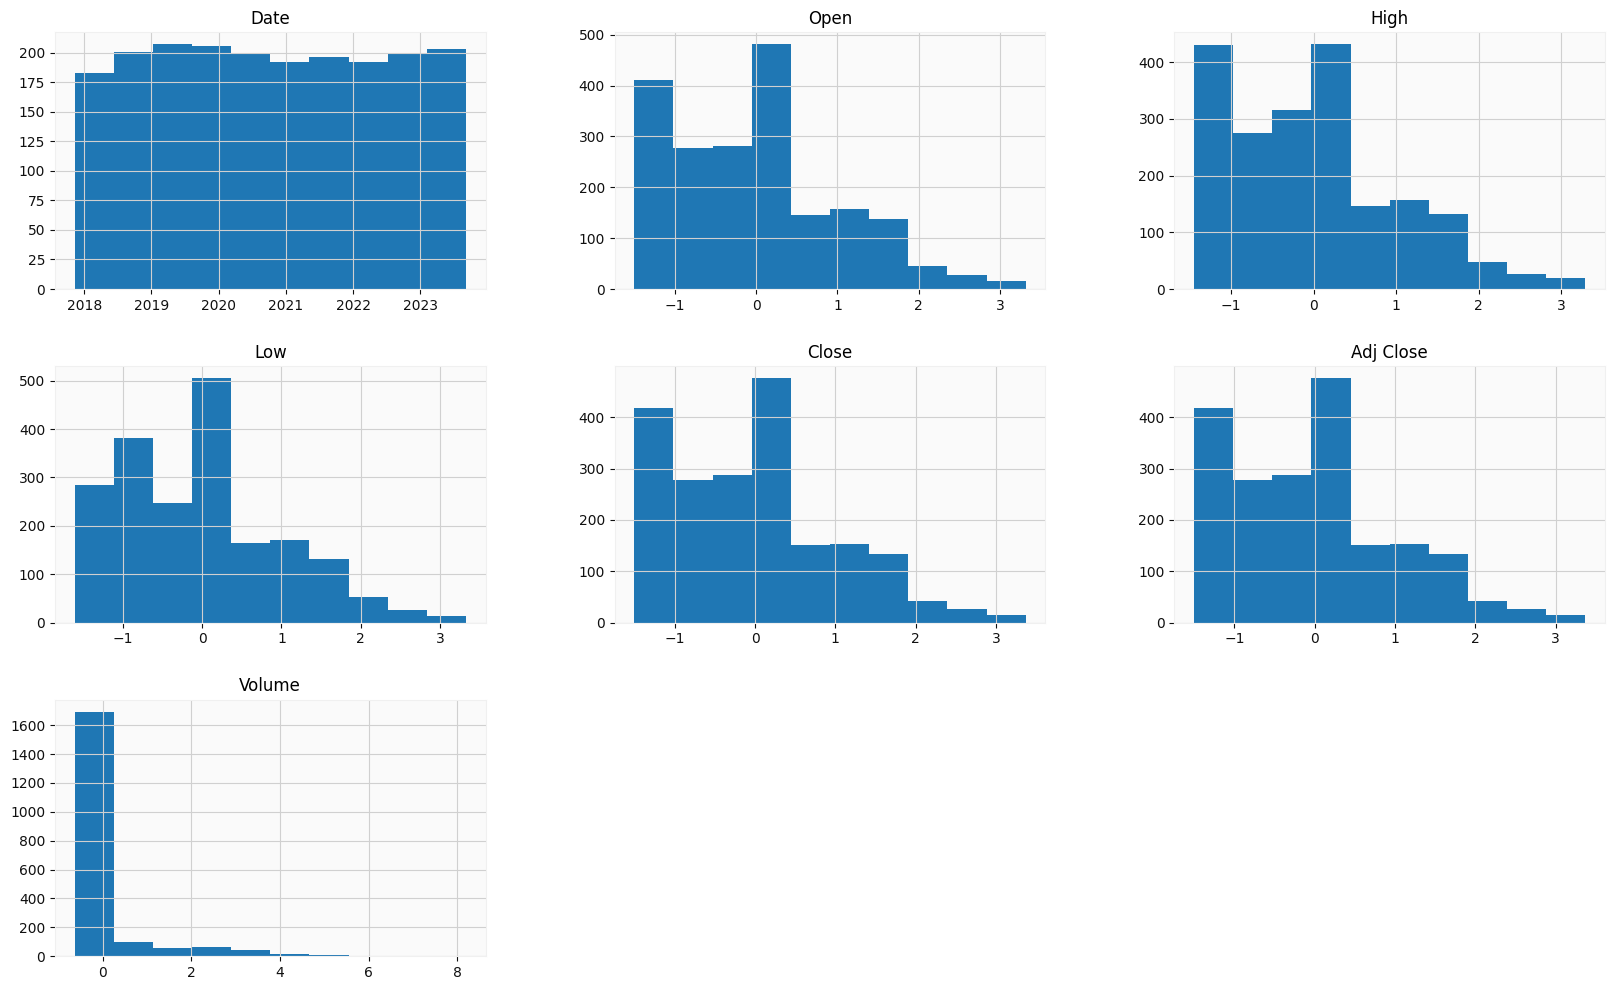

In [90]:
X_train_normalized_ss.hist(figsize=[20, 12])
plt.show()

##### method 2 : Power Transform


In [91]:
X_train_transformed = X_train2.copy()
X_validation_transformed = X_validation2.copy()

power_transformer = PowerTransformer(method="yeo-johnson", standardize=True)

cols = X_train2.drop(columns=["Date"]).columns

X_train_transformed[cols] = power_transformer.fit_transform(X_train_transformed[cols])
X_validation_transformed[cols] = power_transformer.transform(
    X_validation_transformed[cols]
)

In [92]:
X_train_transformed.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1980,1.980000e+03,1.980000e+03,1.980000e+03,1.980000e+03,1.980000e+03,1.980000e+03
mean,2020-10-10 22:56:00,-5.364957e-16,-1.040694e-15,7.284857e-16,-4.647237e-16,-4.647237e-16,6.791425e-15
min,2017-11-09 00:00:00,-2.178174e+00,-2.089292e+00,-2.391010e+00,-2.178588e+00,-2.178588e+00,-2.894524e+00
25%,2019-05-02 18:00:00,-8.417169e-01,-8.291991e-01,-8.439679e-01,-8.412117e-01,-8.412117e-01,-5.251077e-01
50%,2020-09-30 12:00:00,1.643923e-01,1.490385e-01,1.722862e-01,1.647244e-01,1.647244e-01,-4.839358e-02
75%,2022-03-29 06:00:00,7.021731e-01,6.991536e-01,6.722328e-01,6.878030e-01,6.878030e-01,5.498799e-01
max,2023-09-07 00:00:00,2.328384e+00,2.295979e+00,2.364913e+00,2.354131e+00,2.354131e+00,2.610181e+00
std,NaN,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00


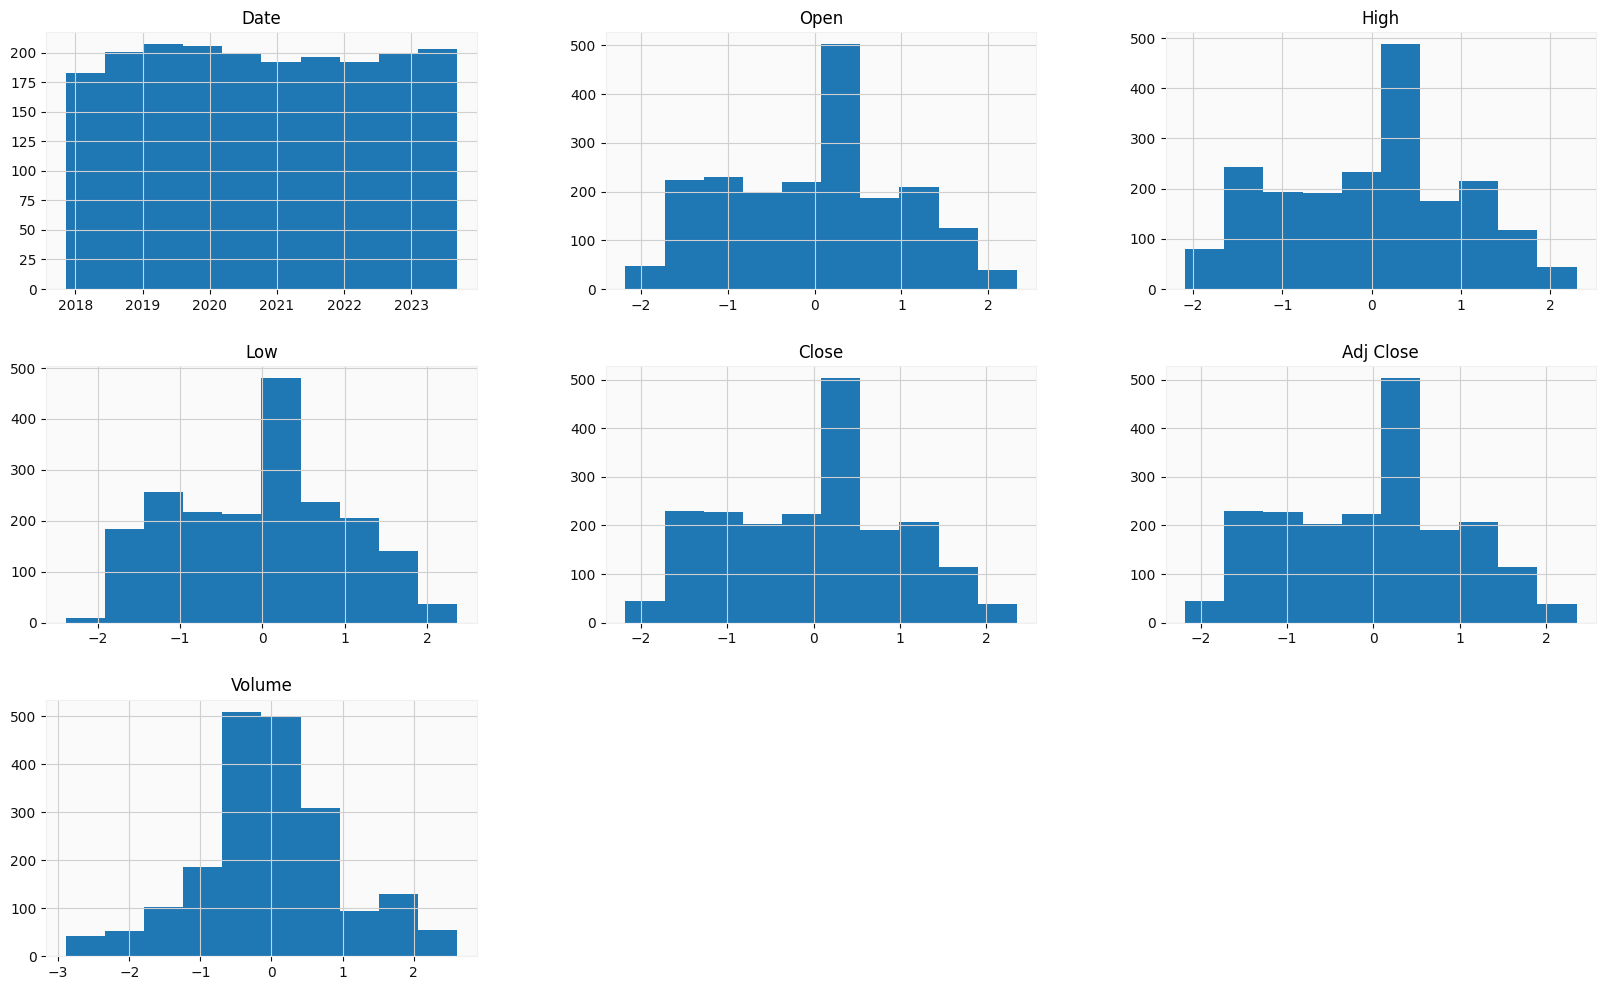

In [93]:
X_train_transformed.hist(figsize=[20, 12])
plt.show()

##### method 3 : Min Max Scaler


In [94]:
X_train_normalized_ms = X_train2.copy()
X_validation_normalized_ms = X_validation2.copy()

scaler_min_max = StandardScaler()
cols = X_train2.drop(columns=["Date"]).columns
X_train_normalized_ms[cols] = scaler_min_max.fit_transform(X_train_normalized_ms[cols])
X_validation_normalized_ms[cols] = scaler_min_max.transform(
    X_validation_normalized_ms[cols]
)

In [95]:
X_train_normalized_ms.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,1980,1.980000e+03,1.980000e+03,1.980000e+03,1.980000e+03,1.980000e+03,1.980000e+03
mean,2020-10-10 22:56:00,-3.050310e-17,6.100619e-17,-1.525155e-16,-4.306320e-17,-4.306320e-17,3.812887e-17
min,2017-11-09 00:00:00,-1.502946e+00,-1.452058e+00,-1.605551e+00,-1.503815e+00,-1.503815e+00,-6.387517e-01
25%,2019-05-02 18:00:00,-8.618324e-01,-8.504989e-01,-8.679532e-01,-8.614705e-01,-8.614705e-01,-4.622156e-01
50%,2020-09-30 12:00:00,-3.546486e-02,-5.901913e-02,-1.535407e-02,-3.467121e-02,-3.467121e-02,-3.444318e-01
75%,2022-03-29 06:00:00,5.686540e-01,5.559186e-01,5.445726e-01,5.511676e-01,5.511676e-01,-7.067270e-02
max,2023-09-07 00:00:00,3.317865e+00,3.294679e+00,3.323993e+00,3.370790e+00,3.370790e+00,8.199471e+00
std,NaN,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00,1.000253e+00


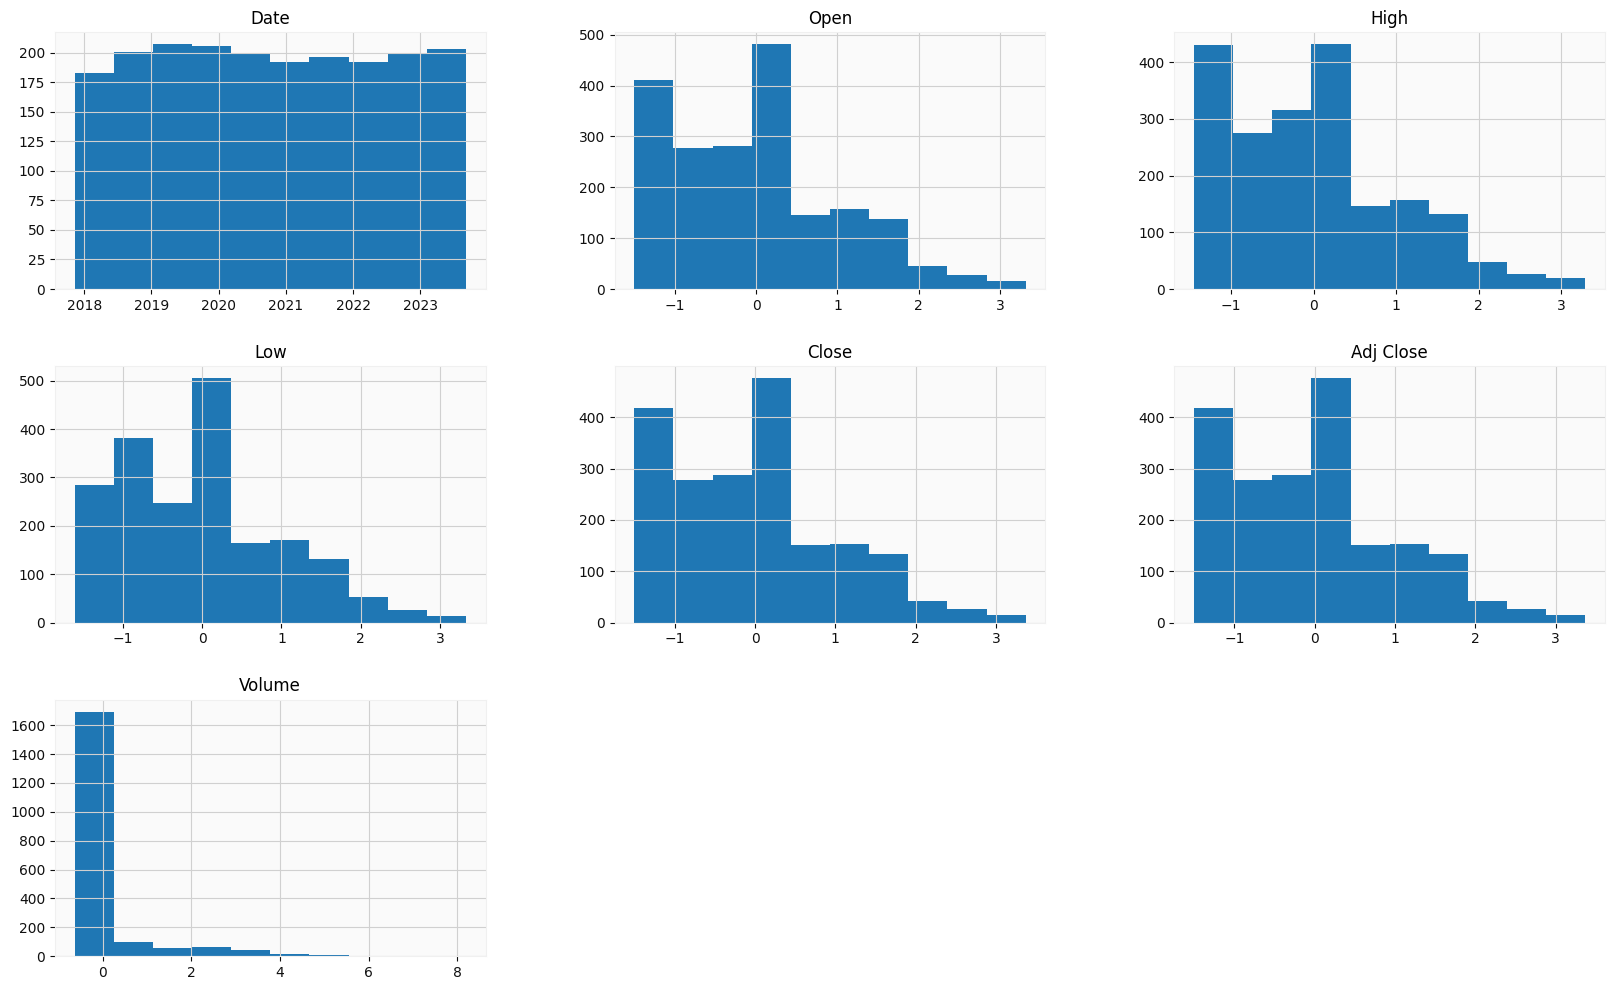

In [96]:
X_train_normalized_ms.hist(figsize=[20, 12])
plt.show()

##### Choose one of normalized data


In [97]:
X_train_normalized = X_train_transformed
X_validation_normalized = X_validation_transformed

### Define Evaluation Matrixes


In [98]:
df_confusion_val_S2 = pd.DataFrame({}, columns=["tn", "fp", "fn", "tp"])
df_evaluation_val_S2 = pd.DataFrame(
    {},
    columns=[
        "Accuracy",
        "Precision",
        "Recall",
        "F1 Score",
        "AUC",
        "MSE",
    ],
)

### Try Models


##### Logistic Regression


In [99]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_name = "Logistic Regression"

df_confusion_val_S2.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
df_evaluation_val_S2.loc[model_name] = {
    "Accuracy": 0,
    "Precision": 0,
    "Recall": 0,
    "F1 Score": 0,
    "AUC": 0,
    "MSE": 0,
}

model_lr.fit(X_train_normalized.drop("Date", axis=1), y_train2)
y_val_pred_lr = model_lr.predict(X_validation_normalized.drop("Date", axis=1))


df_evaluation, df_confusion = evaluation(
    y_validation2, y_val_pred_lr, df_evaluation_val_S2, df_confusion_val_S2, model_name
)
plot_prediction(X_validation_normalized, y_validation2, y_val_pred_lr, model_name)

**************************************************
Model:  Logistic Regression
***********************************
[[21 25]
 [12 47]]
{'AUC': 0.627,
 'Accuracy': 0.648,
 'F1 Score': 0.718,
 'MSE': 0.352,
 'Precision': 0.653,
 'Recall': 0.797}
__________________________________________________


##### Decision Tree


In [100]:
max_depth = 10
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
model_name = "Decision Tree " + str(max_depth)

df_confusion_val_S2.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
df_evaluation_val_S2.loc[model_name] = {
    "Accuracy": 0,
    "Precision": 0,
    "Recall": 0,
    "F1 Score": 0,
    "AUC": 0,
    "MSE": 0,
}

model_dt.fit(X_train_normalized.drop("Date", axis=1), y_train2)
y_val_pred_dt = model_dt.predict(X_validation_normalized.drop("Date", axis=1))


df_evaluation, df_confusion = evaluation(
    y_validation2, y_val_pred_dt, df_evaluation_val_S2, df_confusion_val_S2, model_name
)
plot_prediction(X_validation_normalized, y_validation2, y_val_pred_dt, model_name)

**************************************************
Model:  Decision Tree 10
***********************************
[[13 33]
 [21 38]]
{'AUC': 0.463,
 'Accuracy': 0.486,
 'F1 Score': 0.585,
 'MSE': 0.514,
 'Precision': 0.535,
 'Recall': 0.644}
__________________________________________________


##### SVM


In [101]:
from sklearn.svm import SVC

model_svm = SVC()
model_name = "SVM"

df_confusion_val_S2.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
df_evaluation_val_S2.loc[model_name] = {
    "Accuracy": 0,
    "Precision": 0,
    "Recall": 0,
    "F1 Score": 0,
    "AUC": 0,
    "MSE": 0,
}

model_svm.fit(X_train_normalized.drop("Date", axis=1), y_train2)
y_val_pred_svm = model_svm.predict(X_validation_normalized.drop("Date", axis=1))


df_evaluation, df_confusion = evaluation(
    y_validation2, y_val_pred_svm, df_evaluation_val_S2, df_confusion_val_S2, model_name
)
plot_prediction(X_validation_normalized, y_validation2, y_val_pred_svm, model_name)

**************************************************
Model:  SVM
***********************************
[[ 3 43]
 [ 1 58]]
{'AUC': 0.524,
 'Accuracy': 0.581,
 'F1 Score': 0.725,
 'MSE': 0.419,
 'Precision': 0.574,
 'Recall': 0.983}
__________________________________________________


##### AdaBoost


In [102]:
from sklearn.ensemble import AdaBoostClassifier

model_ada = AdaBoostClassifier(learning_rate=1, random_state=42)
model_name = "Ada Boost"

df_confusion_val_S2.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
df_evaluation_val_S2.loc[model_name] = {
    "Accuracy": 0,
    "Precision": 0,
    "Recall": 0,
    "F1 Score": 0,
    "AUC": 0,
    "MSE": 0,
}

model_ada.fit(X_train_normalized.drop("Date", axis=1), y_train2)
y_val_pred_ada = model_ada.predict(X_validation_normalized.drop("Date", axis=1))


df_evaluation, df_confusion = evaluation(
    y_validation2, y_val_pred_ada, df_evaluation_val_S2, df_confusion_val_S2, model_name
)
plot_prediction(X_validation_normalized, y_validation2, y_val_pred_ada, model_name)

**************************************************
Model:  Ada Boost
***********************************
[[17 29]
 [21 38]]
{'AUC': 0.507,
 'Accuracy': 0.524,
 'F1 Score': 0.603,
 'MSE': 0.476,
 'Precision': 0.567,
 'Recall': 0.644}
__________________________________________________


##### KNN


In [103]:
n_neighbors = 15  # [5, 10, 15, 20]
metric = "manhattan"  # ["euclidean", "minkowski", "manhattan"]

from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=n_neighbors, metric=metric)
model_name = "KNN, K" + str(n_neighbors) + ", Metric: " + metric

df_confusion_val_S2.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
df_evaluation_val_S2.loc[model_name] = {
    "Accuracy": 0,
    "Precision": 0,
    "Recall": 0,
    "F1 Score": 0,
    "AUC": 0,
    "MSE": 0,
}

model_knn.fit(X_train_normalized.drop("Date", axis=1), y_train2)
y_val_pred_knn = model_knn.predict(X_validation_normalized.drop("Date", axis=1))


df_evaluation, df_confusion = evaluation(
    y_validation2, y_val_pred_knn, df_evaluation_val_S2, df_confusion_val_S2, model_name
)
plot_prediction(X_validation_normalized, y_validation2, y_val_pred_knn, model_name)

**************************************************
Model:  KNN, K15, Metric: manhattan
***********************************
[[20 26]
 [23 36]]
{'AUC': 0.522,
 'Accuracy': 0.533,
 'F1 Score': 0.595,
 'MSE': 0.467,
 'Precision': 0.581,
 'Recall': 0.61}
__________________________________________________


##### Random Forest


In [104]:
max_depth = 10
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(
    max_depth=max_depth,
    random_state=42,
    n_estimators=100,
)
model_name = "Random Forest " + str(max_depth)

df_confusion_val_S2.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
df_evaluation_val_S2.loc[model_name] = {
    "Accuracy": 0,
    "Precision": 0,
    "Recall": 0,
    "F1 Score": 0,
    "AUC": 0,
    "MSE": 0,
}

model_rf.fit(X_train_normalized.drop("Date", axis=1), y_train2)
y_val_pred_rf = model_rf.predict(X_validation_normalized.drop("Date", axis=1))


df_evaluation, df_confusion = evaluation(
    y_validation2, y_val_pred_rf, df_evaluation_val_S2, df_confusion_val_S2, model_name
)
plot_prediction(X_validation_normalized, y_validation2, y_val_pred_rf, model_name)

**************************************************
Model:  Random Forest 10
***********************************
[[17 29]
 [18 41]]
{'AUC': 0.532,
 'Accuracy': 0.552,
 'F1 Score': 0.636,
 'MSE': 0.448,
 'Precision': 0.586,
 'Recall': 0.695}
__________________________________________________


##### Gausian


In [105]:
from sklearn.naive_bayes import GaussianNB

model_gnb = GaussianNB()
model_name = "Gaussian NB"

df_confusion_val_S2.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
df_evaluation_val_S2.loc[model_name] = {
    "Accuracy": 0,
    "Precision": 0,
    "Recall": 0,
    "F1 Score": 0,
    "AUC": 0,
    "MSE": 0,
}

model_gnb.fit(X_train_normalized.drop("Date", axis=1), y_train2)
y_val_pred_gnb = model_gnb.predict(X_validation_normalized.drop("Date", axis=1))


df_evaluation, df_confusion = evaluation(
    y_validation2, y_val_pred_gnb, df_evaluation_val_S2, df_confusion_val_S2, model_name
)
plot_prediction(X_validation_normalized, y_validation2, y_val_pred_gnb, model_name)

**************************************************
Model:  Gaussian NB
***********************************
[[ 9 37]
 [11 48]]
{'AUC': 0.505,
 'Accuracy': 0.543,
 'F1 Score': 0.667,
 'MSE': 0.457,
 'Precision': 0.565,
 'Recall': 0.814}
__________________________________________________


##### XGboost


In [106]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier(random_state=42)
model_name = "Xg Boost"

df_confusion_val_S2.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
df_evaluation_val_S2.loc[model_name] = {
    "Accuracy": 0,
    "Precision": 0,
    "Recall": 0,
    "F1 Score": 0,
    "AUC": 0,
    "MSE": 0,
}

model_xgb.fit(X_train_normalized.drop("Date", axis=1), y_train2)
y_val_pred_xgb = model_xgb.predict(X_validation_normalized.drop("Date", axis=1))


df_evaluation, df_confusion = evaluation(
    y_validation2, y_val_pred_xgb, df_evaluation_val_S2, df_confusion_val_S2, model_name
)
plot_prediction(X_validation_normalized, y_validation2, y_val_pred_xgb, model_name)

**************************************************
Model:  Xg Boost
***********************************
[[18 28]
 [27 32]]
{'AUC': 0.467,
 'Accuracy': 0.476,
 'F1 Score': 0.538,
 'MSE': 0.524,
 'Precision': 0.533,
 'Recall': 0.542}
__________________________________________________


### Evaluation


In [129]:
merged_evaluation_val_S2 = (
    df_evaluation_val_S2.reset_index()
    .merge(df_confusion_val_S2.reset_index())
    .set_index("index")
)
merged_evaluation_val_S2.index.name = "Model"
merged_evaluation_val_S2 = merged_evaluation_val_S2.sort_values(
    by=order_columns,
    ascending=[False, False, False, False, True, True, False, True, False, False],
)
merged_evaluation_val_S2[order_columns]

,F1 Score,Accuracy,AUC,MSE,tn,fn,tp,fp,Recall,Precision
Model,,,,,,,,,,
SVM,0.725,0.581,0.524,0.419,3,1,58,43,0.983,0.574
Logistic Regression,0.718,0.648,0.627,0.352,21,12,47,25,0.797,0.653
Gaussian NB,0.667,0.543,0.505,0.457,9,11,48,37,0.814,0.565
Random Forest 10,0.636,0.552,0.532,0.448,17,18,41,29,0.695,0.586
Ada Boost,0.603,0.524,0.507,0.476,17,21,38,29,0.644,0.567
"KNN, K15, Metric: manhattan",0.595,0.533,0.522,0.467,20,23,36,26,0.610,0.581
Decision Tree 10,0.585,0.486,0.463,0.514,13,21,38,33,0.644,0.535
Xg Boost,0.538,0.476,0.467,0.524,18,27,32,28,0.542,0.533


### Test


In [108]:
df_confusion_test_S2 = pd.DataFrame({}, columns=["tn", "fp", "fn", "tp"])
df_evaluation_test_S2 = pd.DataFrame(
    {},
    columns=[
        "Accuracy",
        "Precision",
        "Recall",
        "F1 Score",
        "AUC",
        "MSE",
    ],
)

##### Divide X, y


In [109]:
X_test2 = df_test.drop(columns=["Label"])
y_test2 = df_test["Label"]

##### Normailize


In [110]:
X_test_normalized = X_test.copy()
X_test_normalized[cols] = power_transformer.transform(X_test_normalized[cols])

##### Try Model


In [111]:
model_name = "Random Forest " + str(max_depth)
df_confusion_test_S2.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
df_evaluation_test_S2.loc[model_name] = {
    "Accuracy": 0,
    "Precision": 0,
    "Recall": 0,
    "F1 Score": 0,
    "AUC": 0,
    "MSE": 0,
}

y_test_pred_rf = model_rf.predict(X_test_normalized.drop("Date", axis=1))


df_confusion_test_S2, df_evaluation_test_S2 = evaluation(
    y_test2, y_test_pred_rf, df_evaluation_test_S2, df_confusion_test_S2, model_name
)
plot_prediction(X_test_normalized, y_test2, y_test_pred_rf, model_name)

**************************************************
Model:  Random Forest 10
***********************************
[[ 6  6]
 [ 7 11]]
{'AUC': 0.556,
 'Accuracy': 0.567,
 'F1 Score': 0.629,
 'MSE': 0.433,
 'Precision': 0.647,
 'Recall': 0.611}
__________________________________________________


In [130]:
model_name = "Logistic Regression"
df_confusion_test_S2.loc[model_name] = {"tp": 0, "tn": 0, "fp": 0, "fn": 0}
df_evaluation_test_S2.loc[model_name] = {
    "Accuracy": 0,
    "Precision": 0,
    "Recall": 0,
    "F1 Score": 0,
    "AUC": 0,
    "MSE": 0,
}

y_test_pred_lr = model_lr.predict(X_test_normalized.drop("Date", axis=1))


df_confusion_test_S2, df_evaluation_test_S2 = evaluation(
    y_test2, y_test_pred_lr, df_evaluation_test_S2, df_confusion_test_S2, model_name
)
plot_prediction(X_test_normalized, y_test2, y_test_pred_lr, model_name)

**************************************************
Model:  Logistic Regression
***********************************
[[ 1 11]
 [ 1 17]]
{'AUC': 0.514,
 'Accuracy': 0.6,
 'F1 Score': 0.739,
 'MSE': 0.4,
 'Precision': 0.607,
 'Recall': 0.944}
__________________________________________________
